# Some tests of the `Pauli` class

The class implements some basic tools to calcualte with Pauli strings. The main purpose was to explore the commutability and gate cancellation properties of Trotterized Hamiltonians in terms of Pauli strings, in order to explore ideal orderings.

## Test matrix to Pauli conversion

In [1]:
from kagome_vqe.pauli import Pauli, matrix_to_pauli

op = Pauli('XY')
m = op.matrix()
matrix_to_pauli(m)

'XY'

## Test `commutes_with` method

In [3]:
from kagome_vqe.pauli import Pauli

Pauli('XY').commutes_with(Pauli('YY'))

False

## Test commutator

In [4]:
from kagome_vqe.pauli import com

com('XY','YY').string()

'i*ZI'

## Test products of Pauli strings

Note: Pauli strings are represented as lists of integers (0, 1, 2, 3) corresponding to (I, X, Y, Z).

In [5]:
from kagome_vqe.pauli import pauli_string_product

pauli_string_product([1,1],[2,2])

([3, 3], 2)

## Test properties of trotterized circuit

When trotterizing a Hamiltonian containing a given Pauli string implemented in star + ancilla configuration, the depth is given in terms of the required CNOT gates per Trotter step.

In [7]:
from kagome_vqe.pauli import Pauli

Pauli('XYZI').depth()

6

Test the number of gate cancellations for two Pauli strings meeting each other in a trotterized circuit.

In [8]:
from kagome_vqe.pauli import gate_cancellations

gate_cancellations('XIII','YYYY')

0

Test the resulting total depth of a Trotter step for a given Hamiltonian with multiple Pauli strings.

In [9]:
from kagome_vqe.pauli import total_depth

print( total_depth(['XXYY','XXZZ','XYYY']) )
print( total_depth(['XXZZ','XYYY','XXYY']) )

18
16


## Test the CNOT distance between two Pauli strings

In [52]:
from kagome_vqe.pauli import cnot_distance

print( cnot_distance('XXYY','XXZZ') )
print( cnot_distance('XXZZ','XYYY') )
print( cnot_distance('XXZZ','XYYY') )
print( cnot_distance('XYYY','XXYY') )

4
6
6
2


## Turn a Pauli string into a parameterized circuit for trotterization

In [11]:
from qiskit.circuit import Parameter
from kagome_vqe.pauli import Pauli

t = Parameter('t')
Pauli('XYZI').circuit(t).draw()

┌───┐                                             ┌───┐     
q_0: ─┤ H ├────────■─────────────────────────────────■──┤ H ├─────
     ┌┴───┴┐┌───┐  │                                 │  ├───┤┌───┐
q_1: ┤ Sdg ├┤ H ├──┼────■───────────────────────■────┼──┤ H ├┤ S ├
     └─────┘└───┘  │    │                       │    │  └───┘└───┘
q_2: ──────────────┼────┼────■─────────────■────┼────┼────────────
                   │    │    │             │    │    │            
q_3: ──────────────┼────┼────┼─────────────┼────┼────┼────────────
                 ┌─┴─┐┌─┴─┐┌─┴─┐┌───────┐┌─┴─┐┌─┴─┐┌─┴─┐          
q_4: ────────────┤ X ├┤ X ├┤ X ├┤ Rz(t) ├┤ X ├┤ X ├┤ X ├──────────
                 └───┘└───┘└───┘└───────┘└───┘└───┘└───┘

## Draw commutativity graph for a given set of Pauli strings

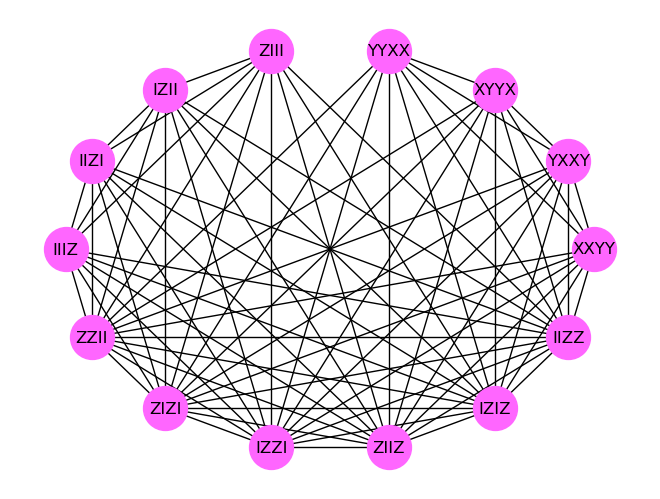

In [12]:
import networkx as nx
from kagome_vqe.pauli import commutativity_graph

ops = ['XXYY','YXXY','XYYX','YYXX','ZIII','IZII','IIZI',
       'IIIZ','ZZII','ZIZI','IZZI','ZIIZ','IZIZ','IIZZ']
g = commutativity_graph(ops)
nx.draw_circular(g, with_labels=True, node_color='#ff66ff', node_size=1000)

Find the cliques in the commutativity graph.

In [88]:
[a,b] = list(nx.find_cliques(g))
print([a,b])
c = []
both = []
for s in a:
    if s in b:
        both.append(s)
        b.remove(s)
    else:
        c.append(s)
print('Clique 1: ', b)
print('Clique 2: ', c)
print('Common  : ', both)

[['IZZI', 'ZZII', 'IZIZ', 'IIZZ', 'ZIIZ', 'ZIZI', 'YYXX', 'YXXY', 'XXYY', 'XYYX'], ['IZZI', 'ZZII', 'IZIZ', 'IIZZ', 'ZIIZ', 'ZIZI', 'ZIII', 'IIZI', 'IZII', 'IIIZ']]
Clique 1:  ['ZIII', 'IIZI', 'IZII', 'IIIZ']
Clique 2:  ['YYXX', 'YXXY', 'XXYY', 'XYYX']
Common  :  ['IZZI', 'ZZII', 'IZIZ', 'IIZZ', 'ZIIZ', 'ZIZI']


## Draw CNOT graph for a given set of Pauli strings

All to all graph with weights given by CNOT distance.

{('YYXX', 'YXXY'): Text(-0.1700734441087663, 0.6884147856781206, '4'),
 ('YYXX', 'XXYY'): Text(-0.8299265558863209, -0.20501270450902506, '8'),
 ('YYXX', 'XYYX'): Text(-4.9129034174200115e-12, 2.3062857179567686e-11, '4'),
 ('YXXY', 'XXYY'): Text(4.912736883966318e-12, -2.3062551868235914e-11, '4'),
 ('YXXY', 'XYYX'): Text(0.8299265558863208, 0.20501270450902537, '8'),
 ('XXYY', 'XYYX'): Text(0.17007344410876613, -0.6884147856781204, '4')}

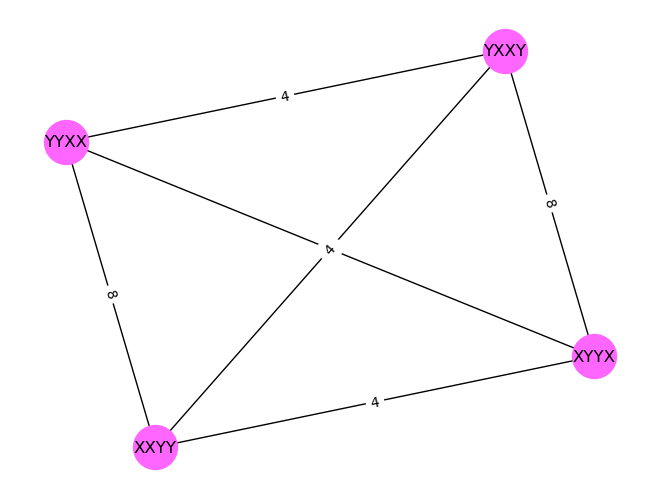

In [13]:
import networkx as nx
from kagome_vqe.pauli import cnot_graph

cng = cnot_graph(['YYXX', 'YXXY', 'XXYY', 'XYYX'])
pos = nx.spring_layout(cng)
nx.draw(cng,pos,with_labels=True, node_color='#ff66ff', node_size=1000)
labels = nx.get_edge_attributes(cng,'weight')
nx.draw_networkx_edge_labels(cng,pos,edge_labels=labels)

# Kagome lattice Hamiltonian

Here we analyze the Hamiltonian of the Kagome lattice. It can be split into dimer parts, cf. section 3 of the notes. We calculate the individual eigenvalues of these parts.

In [1]:
from scipy.linalg import eigh, eigvalsh
from numpy import sqrt
from kagome_vqe.pauli import Pauli

def dimer(n,i,j):
    xstr = ''
    ystr = ''
    zstr = ''
    for k in range(n):
        if k in [i,j]:
            xstr = 'X' + xstr
            ystr = 'Y' + ystr
            zstr = 'Z' + zstr
        else:
            xstr = 'I' + xstr
            ystr = 'I' + ystr
            zstr = 'I' + zstr
    x = Pauli(xstr).matrix()
    y = Pauli(ystr).matrix()
    z = Pauli(zstr).matrix()
    return x+y+z

m1 = dimer(12,0,1)
m2 = dimer(12,11,0)
for i in range(2,12,2):
    m1 += dimer(12,i,i+1)
    m2 += dimer(12,i-1,i)
m3 = dimer(12,0,2) + dimer(12,4,6) + dimer(12,8,10)
m4 = dimer(12,2,4) + dimer(12,6,8) + dimer(12,10,0)

norms = [sqrt(max(eigh(m1@m1,eigvals_only=True))),
         sqrt(max(eigh(m2@m2,eigvals_only=True))),
         sqrt(max(eigh(m3@m3,eigvals_only=True))),
         sqrt(max(eigh(m4@m4,eigvals_only=True)))]
print(norms)

m = m1 + m2 + m3 + m4
total_energy = sqrt(max(eigvalsh(m.dot(m.getH()))))
print(total_energy)

[17.999999999999996, 18.000000000000018, 9.000000000000032, 9.00000000000003]
18.000000000000043
